## Sumber Data Singkatan dan Stoplist
https://github.com/aliakbars/bilp/blob/master/stoplist

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


#Wordcloud
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('youtube_comment-100_labeled.csv')
df

,publishedAt,authorDisplayName,textDisplay,likeCount,clean_text,sentiment_score,sentiment_label
0,2025-10-30T05:20:40Z,@rujalijali3653,Mundur,0,mundur,-1,negative
1,2025-10-28T04:51:47Z,@susilohadiwonosobo9156,"Anies, Ferry 🤮🤮🤮💩💩💩💩🤬🤬🤬🐷🐷💔💔👺👺👺🇵🇱🇵🇱🇵🇱🇵🇱 2029 👎👎...",0,anies ferry,0,neutral
2,2025-10-27T17:40:52Z,@JohanSitorus-z2h,"Suarakan bang, Erick Thohir telah melakukan ...",0,suarakan bang erick thohir telah melakukan kej...,-1,negative
3,2025-10-27T02:32:59Z,@mangasimarpaung978,Pemerintah menindas Olahraga Indonesia. <br>Ma...,1,pemerintah menindas olahraga indonesia masyara...,-2,negative
4,2025-10-25T17:22:20Z,@PresidentOfGamers,"Sudah hampir setahun, saya masih patah hati ST...",0,sudah hampir setahun saya masih patah hati sty...,-3,negative
...,...,...,...,...,...,...,...
95,2025-10-14T15:11:42Z,@O-Project,Federasi BANGSAT krn isinya orang2 BANGSAT. <b...,0,federasi bangsat krn isinya orang bangsat pk p...,1,positive
96,2025-10-14T14:44:14Z,@rubenzeconis5808,Coach kluivert kurang experience di sepakbola...,0,coach kluivert kurang experience di sepakbola ...,-1,negative
97,2025-10-14T14:43:57Z,@ferwintazen6144,Erick Tohir harus mundur secara ksatria dia yg...,0,erick tohir harus mundur secara ksatria dia yg...,-1,negative
98,2025-10-14T14:33:46Z,@Fikry25,Petrik mundur erik mundur ganti ama nurdin hal...,0,petrik mundur erik mundur ganti ama nurdin hal...,-3,negative


In [ ]:
df_selected = df[['clean_text','sentiment_label']]
df_selected.head()

,clean_text,sentiment_label
0,mundur,negative
1,anies ferry,neutral
2,suarakan bang erick thohir telah melakukan kej...,negative
3,pemerintah menindas olahraga indonesia masyara...,negative
4,sudah hampir setahun saya masih patah hati sty...,negative


In [ ]:
#Preprocessing Data
#stopwords dari nltk
nltk_stop = set(stopwords.words('indonesian'))

#stoplist lokal
with open ('stoplist.txt') as f:
    custom_stop = set([w.strip() for w in f.readlines()])

# gabungkan semua stopwords
all_stopwords = nltk_stop.union(custom_stop)
len(all_stopwords)

757

In [ ]:
#Kamus Singkatan (abbreviation)
abbr = pd.read_csv('singkatan-lib.csv',header=None, names=['Singkatan','Asli'])
abbr

,Singkatan,Asli
0,aja,saja
1,akn,akan
2,aku,saya
3,amien,aamiin
4,amin,aamiin
...,...,...
180,y,ya
181,yg,yang
182,yng,yang
183,endonesa,indonesia


In [ ]:
#Convert Singkatan Menjadi Dictionary
abbr_dict = dict(zip(abbr['Singkatan'], abbr['Asli']))
abbr_dict

{'aja': 'saja',
 'akn': 'akan',
 'aku': 'saya',
 'amien': 'aamiin',
 'amin': 'aamiin',
 'and': 'dan',
 'anda': 'kamu',
 'ane': 'saya',
 'ap': 'apa',
 'aps': 'apa',
 'aq': 'saya',
 'bag': 'bagian',
 'banget': 'sangat',
 'beud': 'sangat',
 'bgmn': 'bagaimana',
 'bgt': 'sangat',
 'bkan': 'bukan',
 'bl': 'bila',
 'blg': 'bilang',
 'blh': 'boleh',
 'blm': 'belum',
 'blom': 'belum',
 'blum': 'belum',
 'bpk': 'bapak',
 'bs': 'bisa',
 'bsa': 'bisa',
 'bsk': 'besok',
 'cb': 'coba',
 'cm': 'hanya',
 'cma': 'hanya',
 'cuma': 'hanya',
 'd': 'di',
 'dg': 'dengan',
 'dgn': 'dengan',
 'dlm': 'dalam',
 'dn': 'dan',
 'dng': 'dengan',
 'dpt': 'dapat',
 'dr': 'dari',
 'drpd': 'daripada',
 'dsar': 'dasar',
 'dy': 'dia',
 'dya': 'dia',
 'en': 'dan',
 'enggak': 'tidak',
 'ente': 'kamu',
 'g': 'tidak',
 'ga': 'tidak',
 'gak': 'tidak',
 'gitu': 'begitu',
 'gk': 'tidak',
 'gt': 'begitu',
 'gtau': 'tidak tahu',
 'gua': 'saya',
 'gub': 'gubernur',
 'gue': 'saya',
 'gw': 'saya',
 'hny': 'hanya',
 'hrs': 'harus',


In [ ]:
#Fungsi Preprocessing
def preprocess_text(text):
  tokens = text.split() #Tokenisasi
  #Ganti Singkatan
  tokens = [abbr_dict.get(tok, tok) for tok in tokens] #tok --> Singkatan Token
  #Hapus stopwords
  tokens = [tok for tok in tokens if tok not in all_stopwords]
  #Gabungkan kembali menjadi kalimat
  return ' '.join(tokens)



In [ ]:
df['clean_text_processed'] = df['clean_text'].apply(preprocess_text)
df[['clean_text', 'clean_text_processed', 'sentiment_label']].head()

,clean_text,clean_text_processed,sentiment_label
0,mundur,mundur,negative
1,anies ferry,anies ferry,neutral
2,suarakan bang erick thohir telah melakukan kej...,suarakan bang erick thohir kejahatan mengatur ...,negative
3,pemerintah menindas olahraga indonesia masyara...,pemerintah menindas olahraga indonesia masyara...,negative
4,sudah hampir setahun saya masih patah hati sty...,setahun patah hati sty dipecat bersyukur sisa ...,negative


In [ ]:
# Fungsi bantu untuk membuat wordcloud dari subset data
def generate_wordcloud(text_series, title):
    text = " ".join(text_series)
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

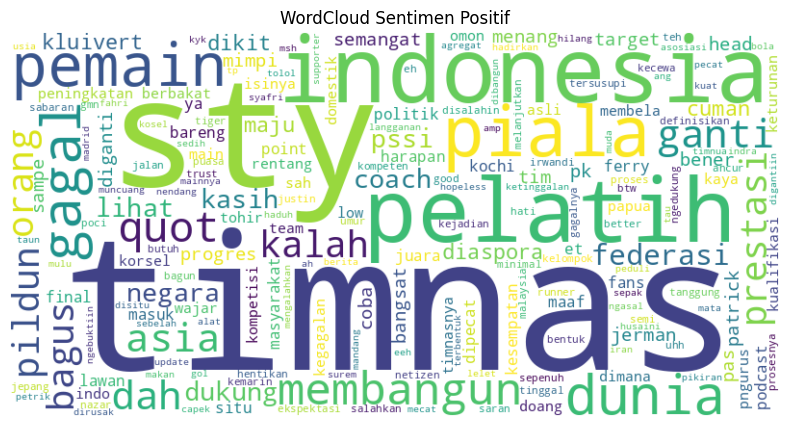

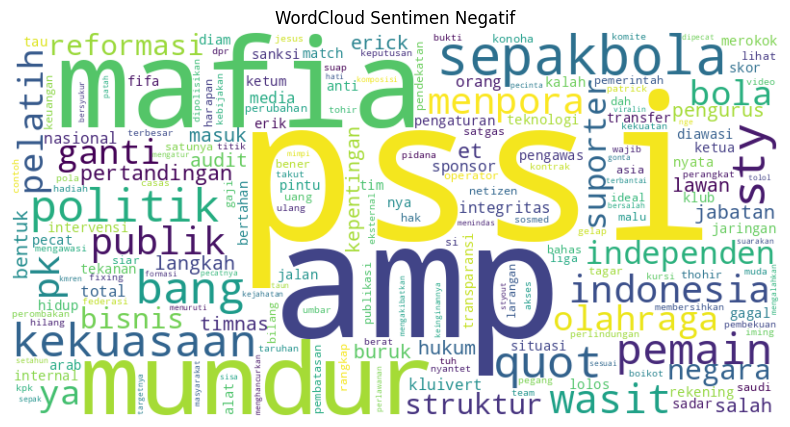

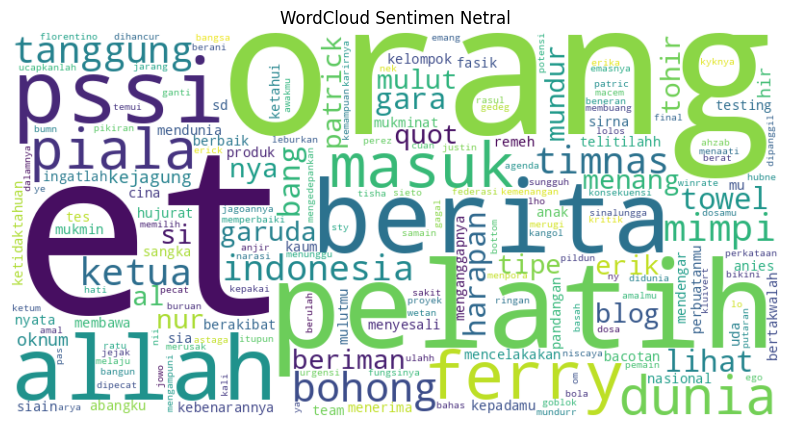

In [ ]:
# Wordcloud untuk sentimen positif
positive_text = df[df['sentiment_label'] == 'positive']['clean_text_processed']
generate_wordcloud(positive_text, "WordCloud Sentimen Positif")

# Wordcloud untuk sentimen negatif
negative_text = df[df['sentiment_label'] == 'negative']['clean_text_processed']
generate_wordcloud(negative_text, "WordCloud Sentimen Negatif")

# Wordcloud untuk sentimen netral
neutral_text = df[df['sentiment_label'] == 'neutral']['clean_text_processed']
generate_wordcloud(neutral_text, "WordCloud Sentimen Netral")

In [ ]:
#Lakukan Proses TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),
    min_df=2
)

X = vectorizer.fit_transform(df['clean_text_processed'])
y = df['sentiment_label']

In [ ]:
#Buat Training / Test Split 80 banding 20

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
#SVM Training (Linear SVC)
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

Akurasi: 0.65

=== Classification Report ===
              precision    recall  f1-score   support

    negative       0.70      0.78      0.74         9
     neutral       0.50      0.50      0.50         6
    positive       0.75      0.60      0.67         5

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.65        20



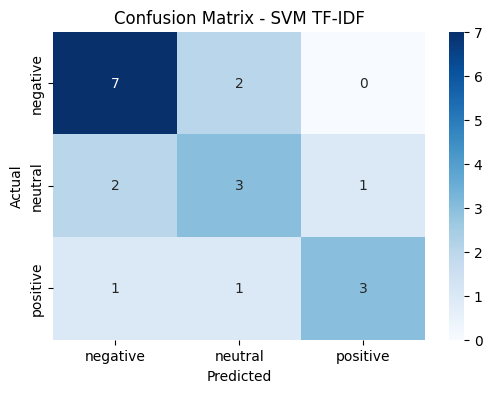

In [ ]:
#Evaluasi Model
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM TF-IDF')
plt.show()

In [ ]:
sample_text = [
    "videonya mantap sekali",
    "suara jelek banget ga enak denger",
    "biasa saja sih tidak terlalu bagus"
]

sample_vec = vectorizer.transform(sample_text)
preds = model.predict(sample_vec)

for t, p in zip(sample_text, preds):
    print(f"{t} --> {p}")

videonya mantap sekali --> neutral
suara jelek banget ga enak denger --> neutral
biasa saja sih tidak terlalu bagus --> positive
